In [1]:
# import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
# load calendar dataset

calendar_df = pd.read_csv('data/calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
# Load listing dataset

listing_df = pd.read_csv('data/listings.csv')
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
# size of the dataframes

print("Listing dataframe has {} rows and {} columns".format(*listing_df.shape))
print("Calendar dataframe has {} rows and {} columns".format(*calendar_df.shape))

Listing dataframe has 3818 rows and 92 columns
Calendar dataframe has 1393570 rows and 4 columns


In [5]:
# Listings Dataframe statistics

listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
# Calendar Dataframe statistics

calendar_df.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [7]:
# Average listings per hosts

no_of_listings = len(listing_df['id'].unique())
no_of_hosts = len(listing_df['host_id'].unique())
avg_listings_per_host = round(no_of_listings / no_of_hosts,2)

print("The total number of listings is {}".format(no_of_listings))
print("The total number of hosts is {}".format(no_of_hosts))
print("The average listings per host is {}".format(avg_listings_per_host))

The total number of listings is 3818
The total number of hosts is 2751
The average listings per host is 1.39


In [8]:
# Range of dates

print("Earliest date is {}".format(calendar_df['date'].min()))
print("Latest date is {}".format(calendar_df['date'].max()))


Earliest date is 2016-01-04
Latest date is 2017-01-02


In [9]:
# Data cleanup

# merge listing_df with calendar_df

listing_df = listing_df.rename(columns={"id": "listing_id"})
df = pd.merge(calendar_df, listing_df, on="listing_id")



In [10]:
# Extract month and year from date

df['date'] = pd.to_datetime(df['date'])
df['host_since'] = pd.to_datetime(df['host_since'])

df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['host_since_yr'] = df['host_since'].dt.year

In [11]:
# drop columns

cols_to_drop = ['host_id','date', 'host_since','host_url','host_name','host_about','host_thumbnail_url',
                'reviews_per_month','first_review','last_review','license','zipcode','summary',
                'requires_license','host_location','listing_url','last_scraped','scrape_id','name',
                'space','description','host_total_listings_count','host_acceptance_rate','host_neighbourhood',
                'square_feet','available','has_availability','availability_30','availability_60',
                'availability_90','availability_365','calendar_last_scraped','host_verifications','city','state','market',
                'smart_location','country_code','country','latitude','longitude','is_location_exact',
                'host_total_listings_count','weekly_price','monthly_price','amenities','security_deposit','cleaning_fee',
                'calendar_updated','extra_people','experiences_offered','street','neighbourhood','neighbourhood_cleansed',
                'jurisdiction_names','price_y','reviews_per_month','neighborhood_overview','notes','transit',
                'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_picture_url', 'extra_people']

df = df.drop(columns=cols_to_drop)

# handle columns with missing values

df = df.dropna(subset=['price_x'])



In [12]:
def fill_mean(df, cols):
    '''Fills null columns with mean value of the column'''
    for col in cols:
        df[col] = df[col].fillna(df[col].mean())
    return df

def fill_mode(df, cols):
    '''Fills null columns with the mode of the column'''
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

def fill_bool(df, cols, bool='f'):
    '''Fills null columns with the specified boolean value'''
    for col in cols:
        df[col] = df[col].fillna(bool)
    return df

cols_to_mean = ['host_response_rate','host_listings_count','review_scores_accuracy','review_scores_cleanliness',
                'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                'review_scores_rating']
cols_to_mode = ['host_since_yr','beds','bedrooms','bathrooms','property_type','host_response_time']
cols_to_bool = ['host_is_superhost','host_has_profile_pic','host_identity_verified']

df['host_response_rate'] = df['host_response_rate'].str.replace("%","").astype("float")

df = fill_mean(df, cols_to_mean)
df = fill_mode(df, cols_to_mode)
df = fill_bool(df, cols_to_bool)


In [13]:
df['price'] = df['price_x'].str.replace("[$, ]","").astype("float")
df = df.drop(columns=['price_x'])

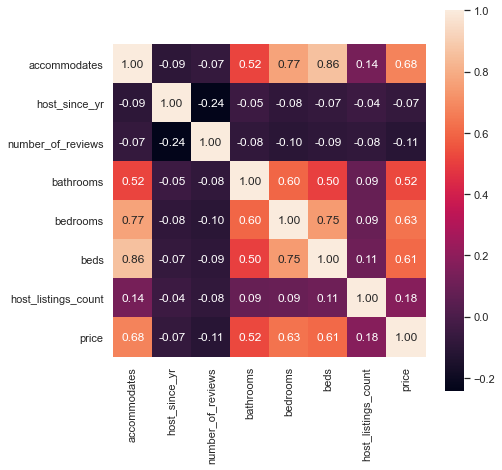

In [14]:
# correlation of fields

cols = ['accommodates','host_since_yr','number_of_reviews','bathrooms',
        'bedrooms','beds','host_listings_count','price']

corr = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, 
                 fmt='.2f', yticklabels=cols, xticklabels=cols)

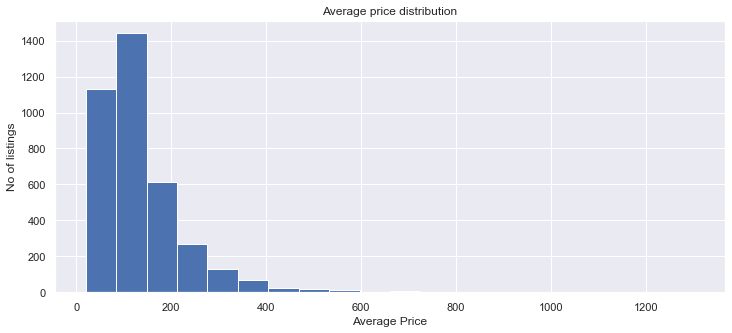

In [15]:
# average price per listing

avg_price = df.groupby(['listing_id'])['price'].mean()

plt.figure(figsize=(12,5))
plt.hist(avg_price,bins=20)
plt.ylabel('No of listings')
plt.xlabel('Average Price')
plt.title('Average price distribution')
plt.show()



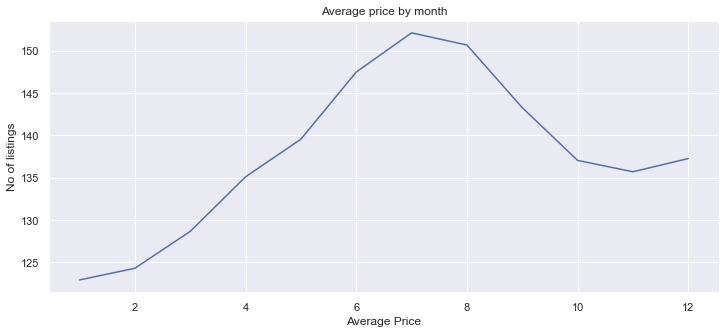

In [16]:
# average price per month

avg_price_month = df.groupby('month')['price'].mean()

plt.figure(figsize=(12,5))
plt.plot(avg_price_month)
plt.ylabel('No of listings')
plt.xlabel('Average Price')
plt.title('Average price by month')
plt.show()

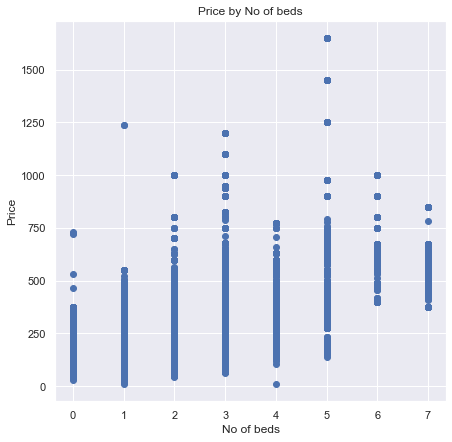

In [17]:
# Price by Beds

plt.scatter(df['bedrooms'], df['price'])
plt.ylabel('Price')
plt.xlabel('No of beds')
plt.title('Price by No of beds')
plt.show()

<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

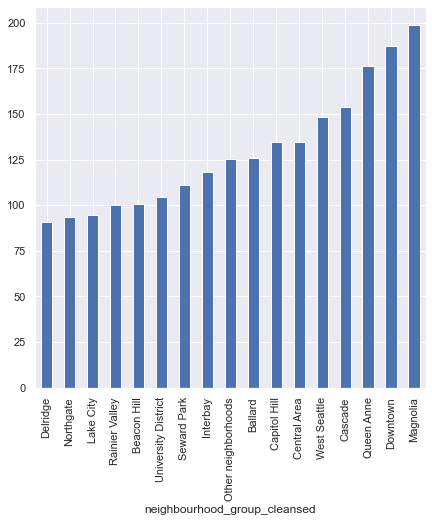

In [18]:
# Does the neighbourhood affect the price

grouped_df = df.groupby('neighbourhood_group_cleansed')['price'].mean()

grouped_df = grouped_df.sort_values()

grouped_df.plot(kind='bar')

<AxesSubplot:xlabel='room_type'>

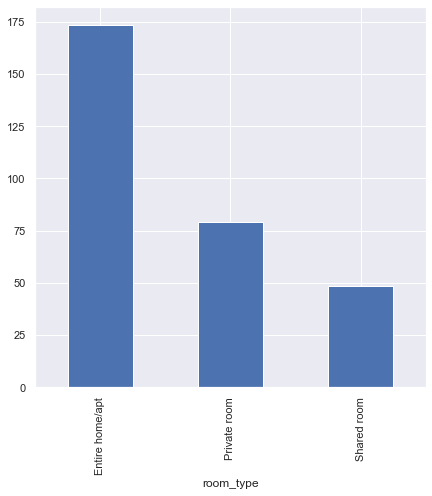

In [19]:
# does room type affect price

df.groupby('room_type')['price'].mean().plot(kind='bar')



<AxesSubplot:xlabel='host_response_time'>

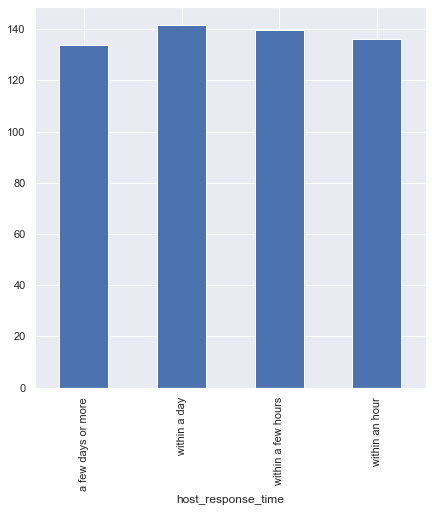

In [20]:
# does the host response time affect price

df.groupby('host_response_time')['price'].mean().plot(kind='bar')

In [21]:
# categorical columns

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col,
                                prefix_sep='_', dummy_na=True)], axis=1)